In [28]:
import numpy as np
import matplotlib.pyplot as plt


def cutoff_function(R_ij, R_c):
    
    if R_ij <= R_c:
        return 0.5 * (np.cos(np.pi * R_ij / R_c) + 1)
    else:
        return 0

1. Obtain element-speciﬁc neighbour densities for each atom in the system.

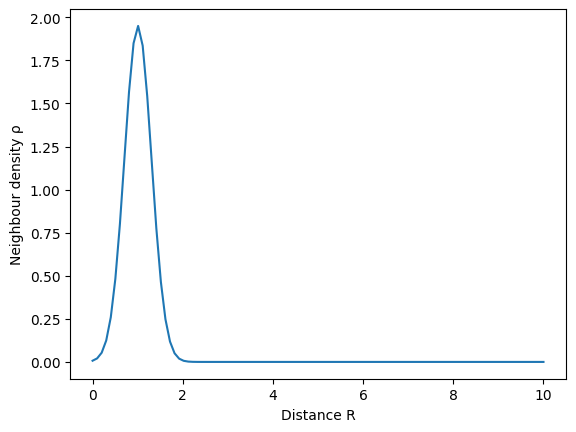

In [ ]:
# water molecule positions


O = np.array([0.0000 ,0.00000 , 0.0000])
H1 = np.array([0.48921,-0.80635,0.35195])
H2 = np.array([0.48921, 0.80635, 0.35195])

N_atoms = 3
atoms = np.zeros((N_atoms,3))

atoms[0] = O
atoms[1] = H1
atoms[2] = H2

species = ['O','H','H']

def neighbour_density(R: float,i,s,atoms: np.ndarray, species: np.ndarray, sigma_a: float=0.3, R_c: float=10):
    '''
    each atom (i) has a neighbourDensity (rho) for each species (s).
    '''
    
    rho = 0
    
    for j in range(0,len(atoms)):
        
        if s == species[j]:
            
            
            Rij = np.linalg.norm(atoms[i] - atoms[j])
            
    
            rho += np.exp(-(np.linalg.norm(R - Rij)**2 ) / (2*sigma_a**2)) * cutoff_function(Rij,R_c)

            
    return rho



def example_plot():
    
    x = np.linspace(-5,5,100)
    y = 
    
    Rvals = np.linspace(0, 10, 100)
    Rho_O = [neighbour_density(R, 0, 'H', atoms, species) for R in Rvals]

    fig, ax = plt.subplots()
    ax.plot(Rvals, Rho_O)
    ax.set_xlabel("Distance R")
    ax.set_ylabel("Neighbour density ρ")
    plt.show()

example_plot()
